In [1]:
def read_metrics(algo_name, IDs, key):
    metrics = []
    
    for ID in IDs:
        eval_data = np.load(f'{algo_name}/logs/{ID}/eval.npy')
        metric = np.array([data[key] for data in eval_data]).flatten()
        metrics.append(metric)
    
    return metrics

### Compare A2C with and without standardization of the discounted returns

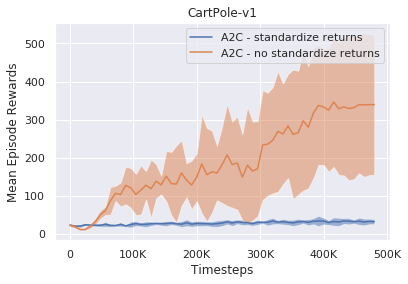

In [3]:
import numpy as np
from lagom.experiment import Config
from lagom.core.plotter import CurvePlot


a2c_configs = Config.to_pandas_dataframe(np.load('a2c/logs/configs.npy'))
IDs_standardize = a2c_configs.loc[a2c_configs['agent:standardize'] == True]['ID'].values
IDs_no_standardize = a2c_configs.loc[a2c_configs['agent:standardize'] == False]['ID'].values

a2c_standardize = read_metrics(algo_name='a2c', 
                               IDs=IDs_standardize, 
                               key='average_return')
a2c_no_standardize = read_metrics(algo_name='a2c', 
                                  IDs=IDs_no_standardize, 
                                  key='average_return')

a2c_xvalues = read_metrics(algo_name='a2c', 
                           IDs=[0], 
                           key='accumulated_trained_timesteps')[0]

plot = CurvePlot()
plot.add('A2C - standardize returns', 
         data=a2c_standardize, 
         xvalues=a2c_xvalues)
plot.add('A2C - no standardize returns', 
         data=a2c_no_standardize, 
         xvalues=a2c_xvalues)

ax = plot(title='CartPole-v1', 
          xlabel='Timesteps', 
          ylabel='Mean Episode Rewards', 
          num_tick=6, 
          xscale_magnitude='K')
ax

### Compare Actor-Critic (or Vanilla Policy Gradient) with and without standardization of the discounted returns

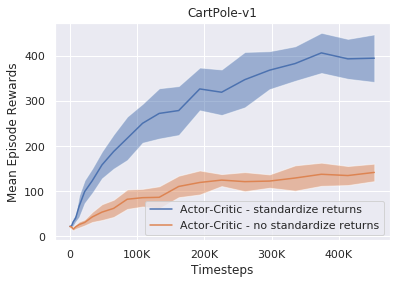

In [3]:
import numpy as np
from lagom.experiment import Config
from lagom.core.plotter import CurvePlot


actor_critic_configs = Config.to_pandas_dataframe(np.load('actor_critic/logs/configs.npy'))
IDs_standardize = actor_critic_configs.loc[actor_critic_configs['agent:standardize'] == True]['ID'].values
IDs_no_standardize = actor_critic_configs.loc[actor_critic_configs['agent:standardize'] == False]['ID'].values

actor_critic_standardize = read_metrics(algo_name='actor_critic', 
                                        IDs=IDs_standardize, 
                                        key='average_return')
actor_critic_no_standardize = read_metrics(algo_name='actor_critic', 
                                           IDs=IDs_no_standardize, 
                                           key='average_return')

# Different random seeds with different x values, so we average them
actor_critic_xvalues = read_metrics(algo_name='actor_critic', 
                                    IDs=IDs_standardize, 
                                    key='accumulated_trained_timesteps')
actor_critic_xvalues = np.mean(actor_critic_xvalues, axis=0).astype(int)

plot = CurvePlot()
plot.add('Actor-Critic - standardize returns', 
         data=actor_critic_standardize, 
         xvalues=actor_critic_xvalues)
plot.add('Actor-Critic - no standardize returns', 
         data=actor_critic_no_standardize, 
         xvalues=actor_critic_xvalues)

ax = plot(title='CartPole-v1', 
          xlabel='Timesteps', 
          ylabel='Mean Episode Rewards', 
          num_tick=6, 
          xscale_magnitude='K')
ax

### Compare REINFORCE with and without standardization of the discounted returns

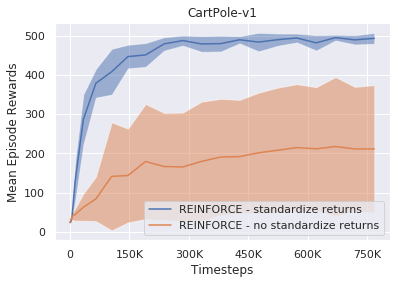

In [4]:
import numpy as np
from lagom.experiment import Config
from lagom.core.plotter import CurvePlot


reinforce_configs = Config.to_pandas_dataframe(np.load('reinforce/logs/configs.npy'))
IDs_standardize = reinforce_configs.loc[reinforce_configs['agent:standardize'] == True]['ID'].values
IDs_no_standardize = reinforce_configs.loc[reinforce_configs['agent:standardize'] == False]['ID'].values

reinforce_standardize = read_metrics(algo_name='reinforce', 
                                        IDs=IDs_standardize, 
                                        key='average_return')
reinforce_no_standardize = read_metrics(algo_name='reinforce', 
                                           IDs=IDs_no_standardize, 
                                           key='average_return')

# Different random seeds with different x values, so we average them
reinforce_xvalues = read_metrics(algo_name='reinforce', 
                                 IDs=IDs_standardize, 
                                 key='accumulated_trained_timesteps')
reinforce_xvalues = np.mean(reinforce_xvalues, axis=0).astype(int)

plot = CurvePlot()
plot.add('REINFORCE - standardize returns', 
         data=reinforce_standardize, 
         xvalues=reinforce_xvalues)
plot.add('REINFORCE - no standardize returns', 
         data=reinforce_no_standardize, 
         xvalues=reinforce_xvalues)

ax = plot(title='CartPole-v1', 
          xlabel='Timesteps', 
          ylabel='Mean Episode Rewards', 
          num_tick=6, 
          xscale_magnitude='K')
ax

### Compare REINFORCE, Actor-Critic and A2C

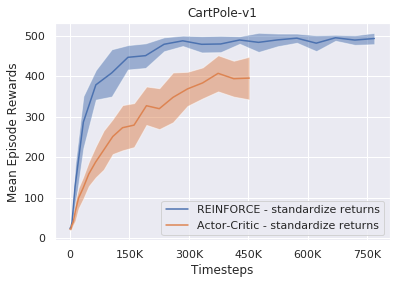

In [5]:
plot = CurvePlot()
plot.add('REINFORCE - standardize returns', 
         data=reinforce_standardize, 
         xvalues=reinforce_xvalues)
plot.add('Actor-Critic - standardize returns', 
         data=actor_critic_standardize, 
         xvalues=actor_critic_xvalues)
#plot.add('A2C - standardize returns', 
#         data=a2c_standardize, 
#         xvalues=a2c_xvalues)

ax = plot(title='CartPole-v1', 
          xlabel='Timesteps', 
          ylabel='Mean Episode Rewards', 
          num_tick=6, 
          xscale_magnitude='K')
ax

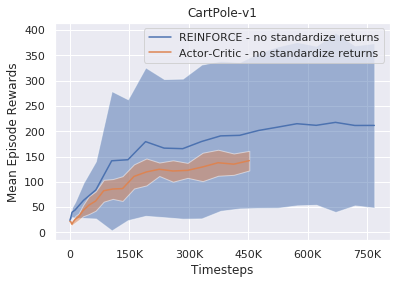

In [6]:
plot = CurvePlot()
plot.add('REINFORCE - no standardize returns', 
         data=reinforce_no_standardize, 
         xvalues=reinforce_xvalues)
plot.add('Actor-Critic - no standardize returns', 
         data=actor_critic_no_standardize, 
         xvalues=actor_critic_xvalues)
#plot.add('A2C - no standardize returns', 
#         data=a2c_no_standardize, 
#         xvalues=a2c_xvalues)

ax = plot(title='CartPole-v1', 
          xlabel='Timesteps', 
          ylabel='Mean Episode Rewards', 
          num_tick=6, 
          xscale_magnitude='K')
ax

#  NEW TESTTTTTTTTTTTTTT
